In [1]:
import thinkdsp
import thinkplot
import matplotlib
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

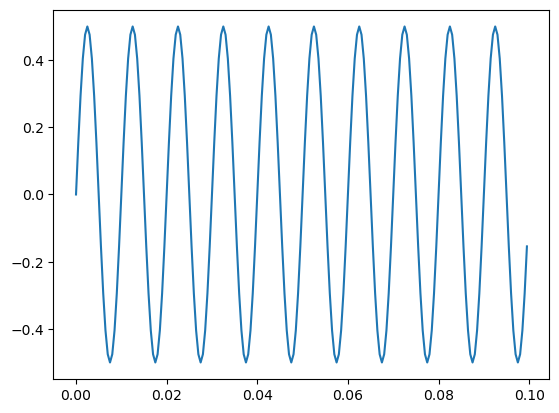

In [3]:
sin_sig = thinkdsp.SinSignal(freq=100.0, amp=0.5, offset=0)
sin_wave = sin_sig.make_wave(duration=0.1, framerate=2000)
sin_wave.plot()

In [4]:
corrs2 = np.correlate(sin_wave.ys, sin_wave.ys, mode='same')

200

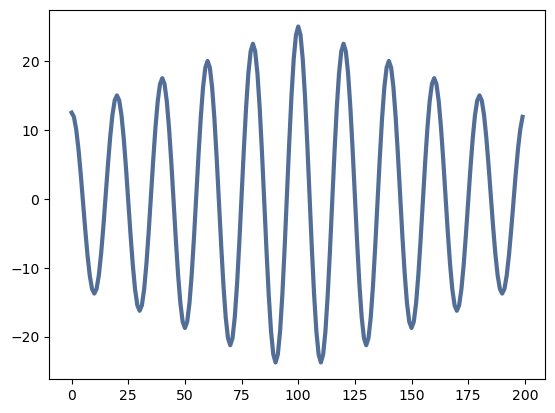

In [7]:
x_Achse = np.arange(0, len(sin_wave.ys))
thinkplot.plot(x_Achse,corrs2)
len(sin_wave.ys)

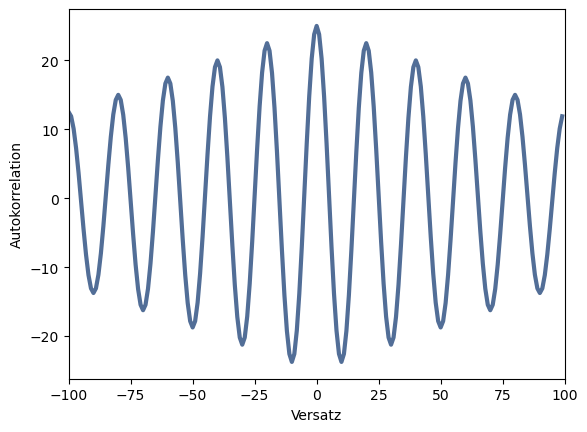

In [8]:
N = len(sin_wave) #Länge des Arrays
lags = np.arange(-N//2, N//2) # lags ist die Versetzung
thinkplot.plot(lags, corrs2)
thinkplot.config(xlabel='Versatz', ylabel='Autokorrelation', xlim=[-N//2, N//2])

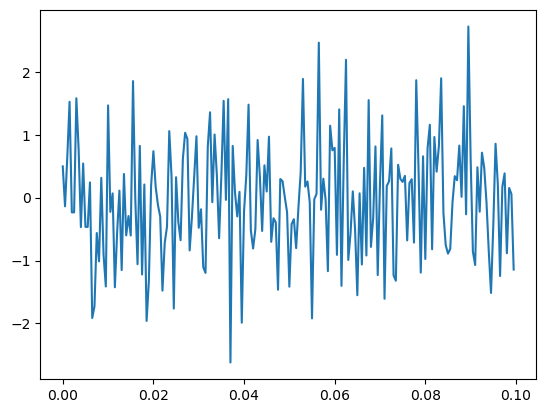

In [9]:
thinkdsp.random_seed(42)
noise_sig = thinkdsp.UncorrelatedGaussianNoise(amp=1.0)
noise_wave = noise_sig.make_wave(duration=0.1, framerate=2000)
noise_wave.plot()

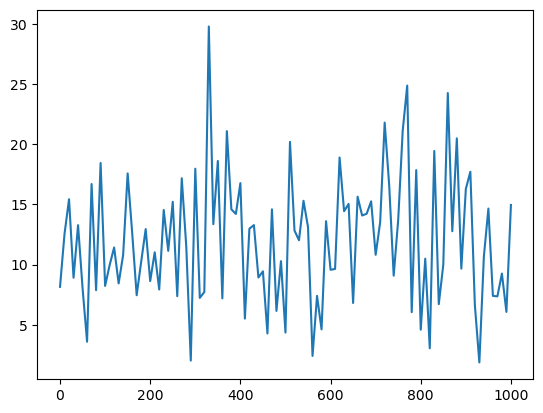

In [10]:
spec_noise = noise_wave.make_spectrum()
spec_noise.plot()

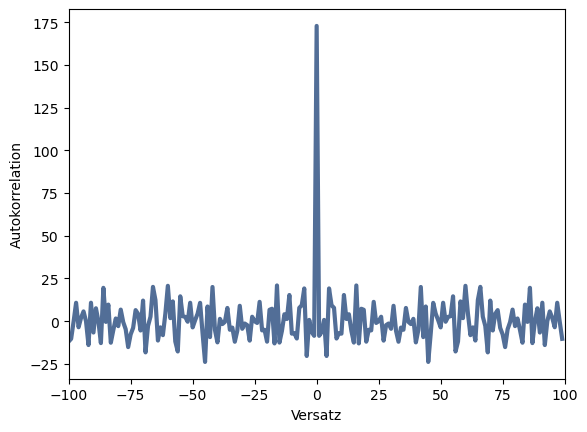

In [11]:
N = len(noise_wave)
corrs_noise = np.correlate(noise_wave.ys, noise_wave.ys, mode='same')
lags = np.arange(-N//2, N//2)
thinkplot.plot(lags, corrs_noise)
thinkplot.config(xlabel='Versatz', ylabel='Autokorrelation', xlim=[-N//2, N//2])

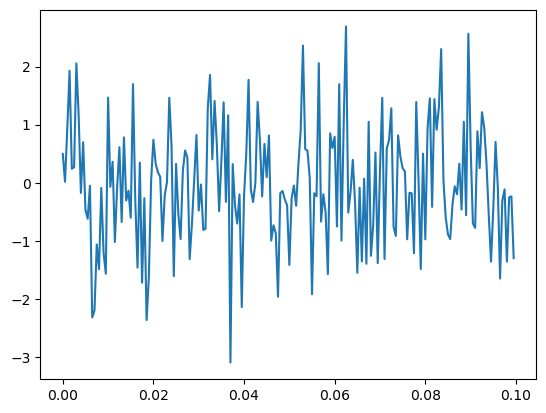

In [12]:
noisy_sine = sin_wave + noise_wave
noisy_sine.plot()

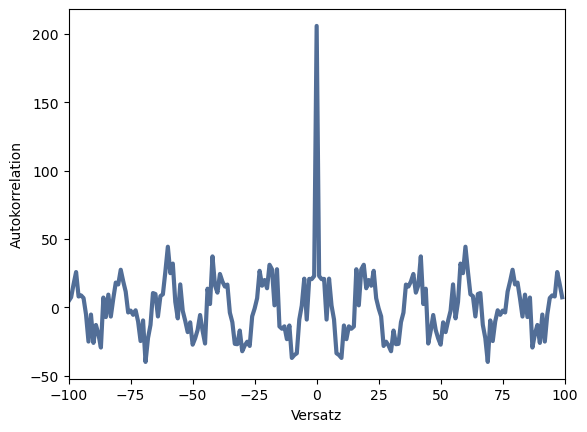

In [13]:
N = len(noisy_sine)
sine_noise = np.correlate(noisy_sine.ys, noisy_sine.ys, mode='same')
lags = np.arange(-N//2, N//2)
thinkplot.plot(lags, sine_noise)
thinkplot.config(xlabel='Versatz', ylabel='Autokorrelation', xlim=[-N//2, N//2])

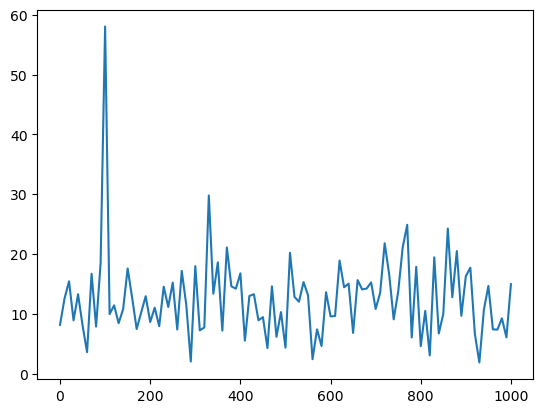

In [14]:
spec_noisy_sine = noisy_sine.make_spectrum()
spec_noisy_sine.plot()

In [15]:
def make_sine_with_noise(offset): # Generate a sinwave with SNR of 2
    noise_signal = thinkdsp.UncorrelatedGaussianNoise(amp=0.5)
    signal = thinkdsp.SinSignal(amp=0.5, freq=500, offset=offset)
    mix = signal + noise_signal
    wave = mix.make_wave(duration=0.5, framerate=10000)
    wave.normalize()
    return wave

In [16]:
def gen_waves(offset): # Generate two sinwaves with a defined phase offset
    wave1 = make_sine_with_noise(offset=0)
    wave2 = make_sine_with_noise(offset=-offset)
    wave1.normalize()
    wave2.normalize()
    return wave1.segment(duration=0.01), wave2.segment(duration=0.01)

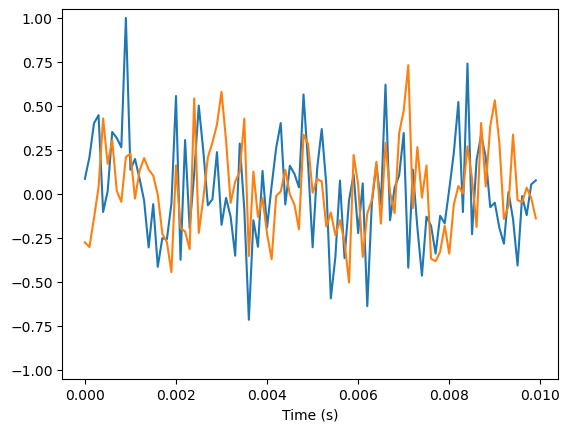

In [17]:
wave1, wave2 = gen_waves(np.pi/2) # Generate two waves with pi/2 offset
wave1.plot()
wave2.plot()
thinkplot.config(xlabel='Time (s)', ylim=[-1.05, 1.05])

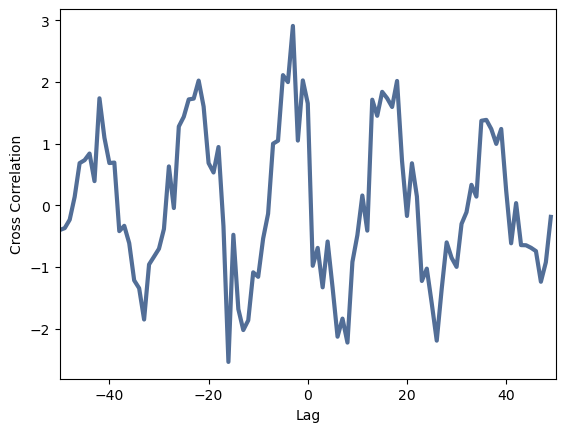

In [18]:
N = len(wave1)
corrs2 = np.correlate(wave1.ys, wave2.ys, mode='same')
lags = np.arange(-N//2, N//2)
thinkplot.plot(lags, corrs2)
thinkplot.config(xlabel='Lag', ylabel='Cross Correlation', xlim=[-N//2, N//2])